In [1]:
#A1
import numpy as np
import pandas as pd

# Data table provided
data = {'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
        'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
        'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
        'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
        'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']}

df = pd.DataFrame(data)

# Calculate Entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_value = np.sum([(-counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy_value

# Calculate Information Gain
def information_gain(data, split_attribute_name, target_name="buys_computer"):
    total_entropy = entropy(data[target_name])
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[split_attribute_name] == vals[i]).dropna()[target_name]) for i in range(len(vals))])
    info_gain = total_entropy - weighted_entropy
    return info_gain

# Calculate Information Gain for each attribute
attributes = ['age', 'income', 'student', 'credit_rating']
for attribute in attributes:
    print(f'Information Gain for {attribute}: {information_gain(df, attribute)}')


Information Gain for age: 0.24674981977443933
Information Gain for income: 0.02922256565895487
Information Gain for student: 0.15183550136234159
Information Gain for credit_rating: 0.04812703040826949


In [3]:
#A2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Encoding categorical variables
df_encoded = pd.get_dummies(df[['age', 'income', 'student', 'credit_rating']])
y = df['buys_computer'].apply(lambda x: 1 if x == 'yes' else 0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Print tree depth
print(f'Tree Depth: {model.get_depth()}')


Tree Depth: 4


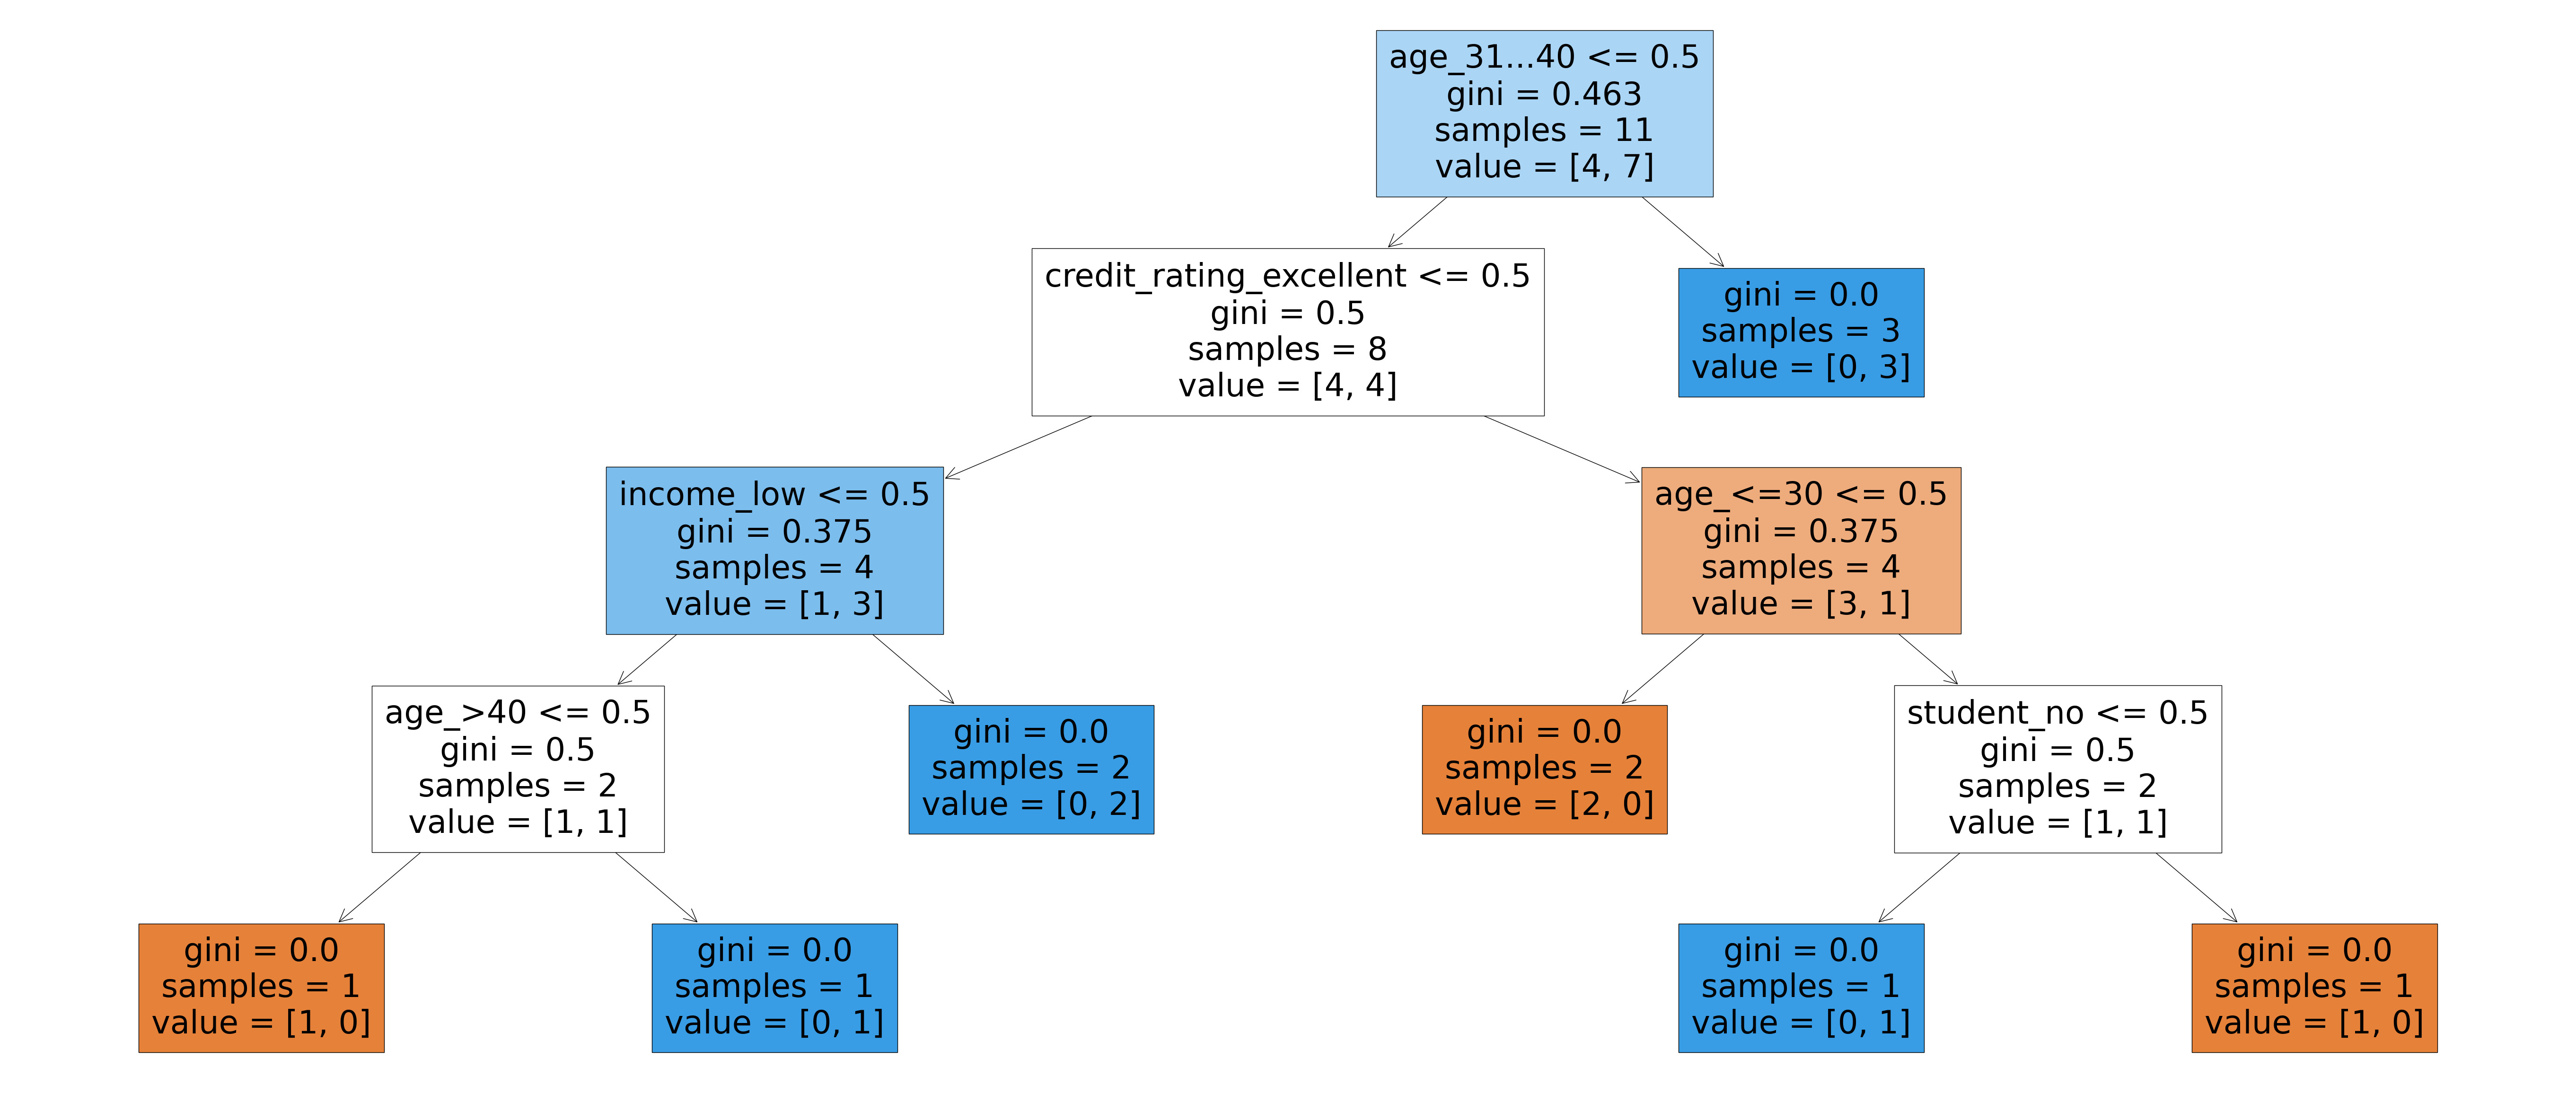

In [7]:
#A3
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(70,30))
plot_tree(model, feature_names=df_encoded.columns, filled=True)
plt.show()


Training Accuracy: 1.0
Test Accuracy: 0.0


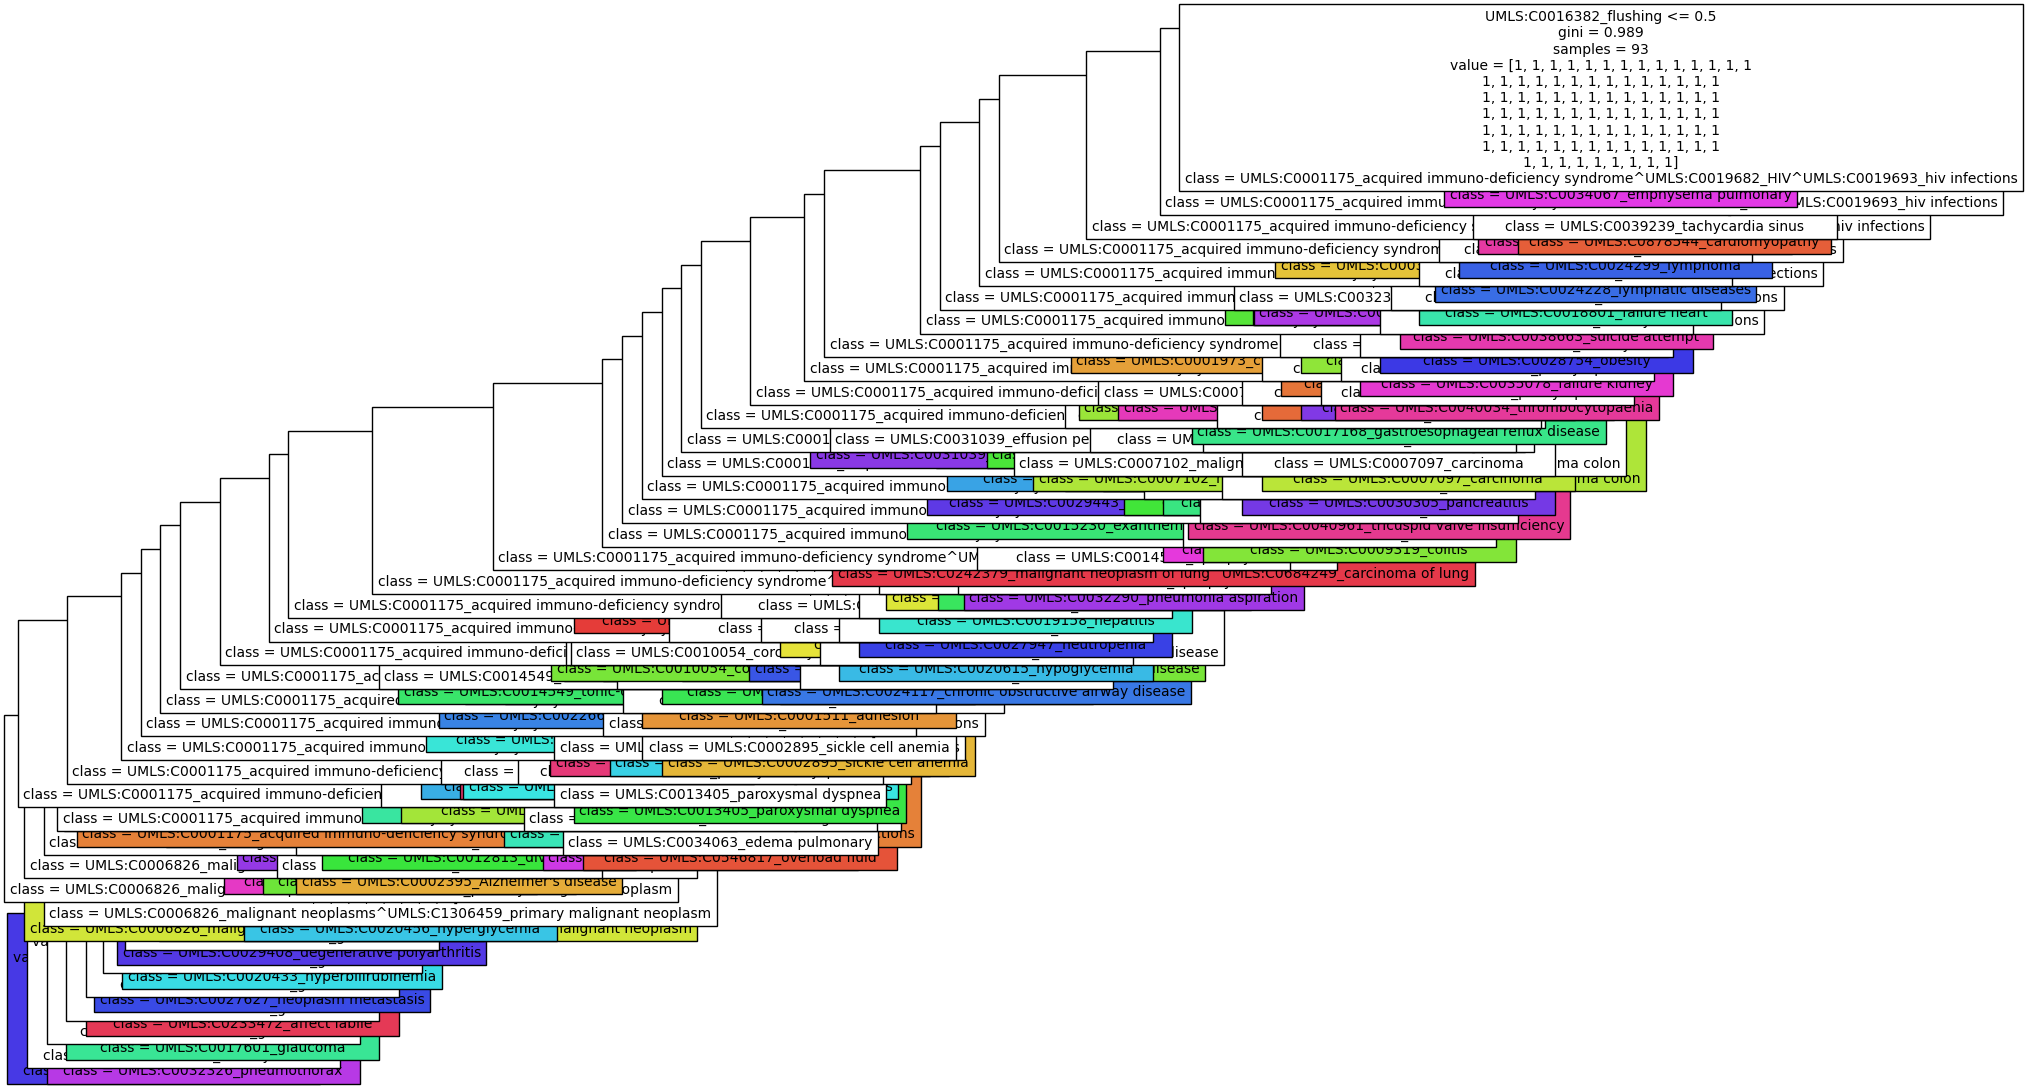

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
project_df=pd.read_csv('D:\Sem 5\projects\ML\main.csv')

# Define features (X) and target (y)
X_project = project_df.drop(columns=['label'])  # Dropping label column to use features
y_project = project_df['label']



# Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in X_project.select_dtypes(include=['object']).columns:
    X_project[col] = le.fit_transform(X_project[col])

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_project, y_project, test_size=0.3, random_state=42)

# Train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
model_project = DecisionTreeClassifier()
model_project.fit(X_train, y_train)

# Check accuracy
train_accuracy = model_project.score(X_train, y_train)
test_accuracy = model_project.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Convert class names and feature names to lists
class_names = list(model_project.classes_)
feature_names = list(X_train.columns)

# Plot the decision tree with larger font size and figure size
plt.figure(figsize=(20, 12))  # Adjust figure size
plot_tree(model_project, 
          filled=True, 
          feature_names=feature_names,  # Convert column names to list
          class_names=class_names,  # Convert class names to list
          fontsize=10)  # Increase font size for better visibility
plt.show()

Training Accuracy (Max Depth=5): 0.08602150537634409
Test Accuracy (Max Depth=5): 0.0


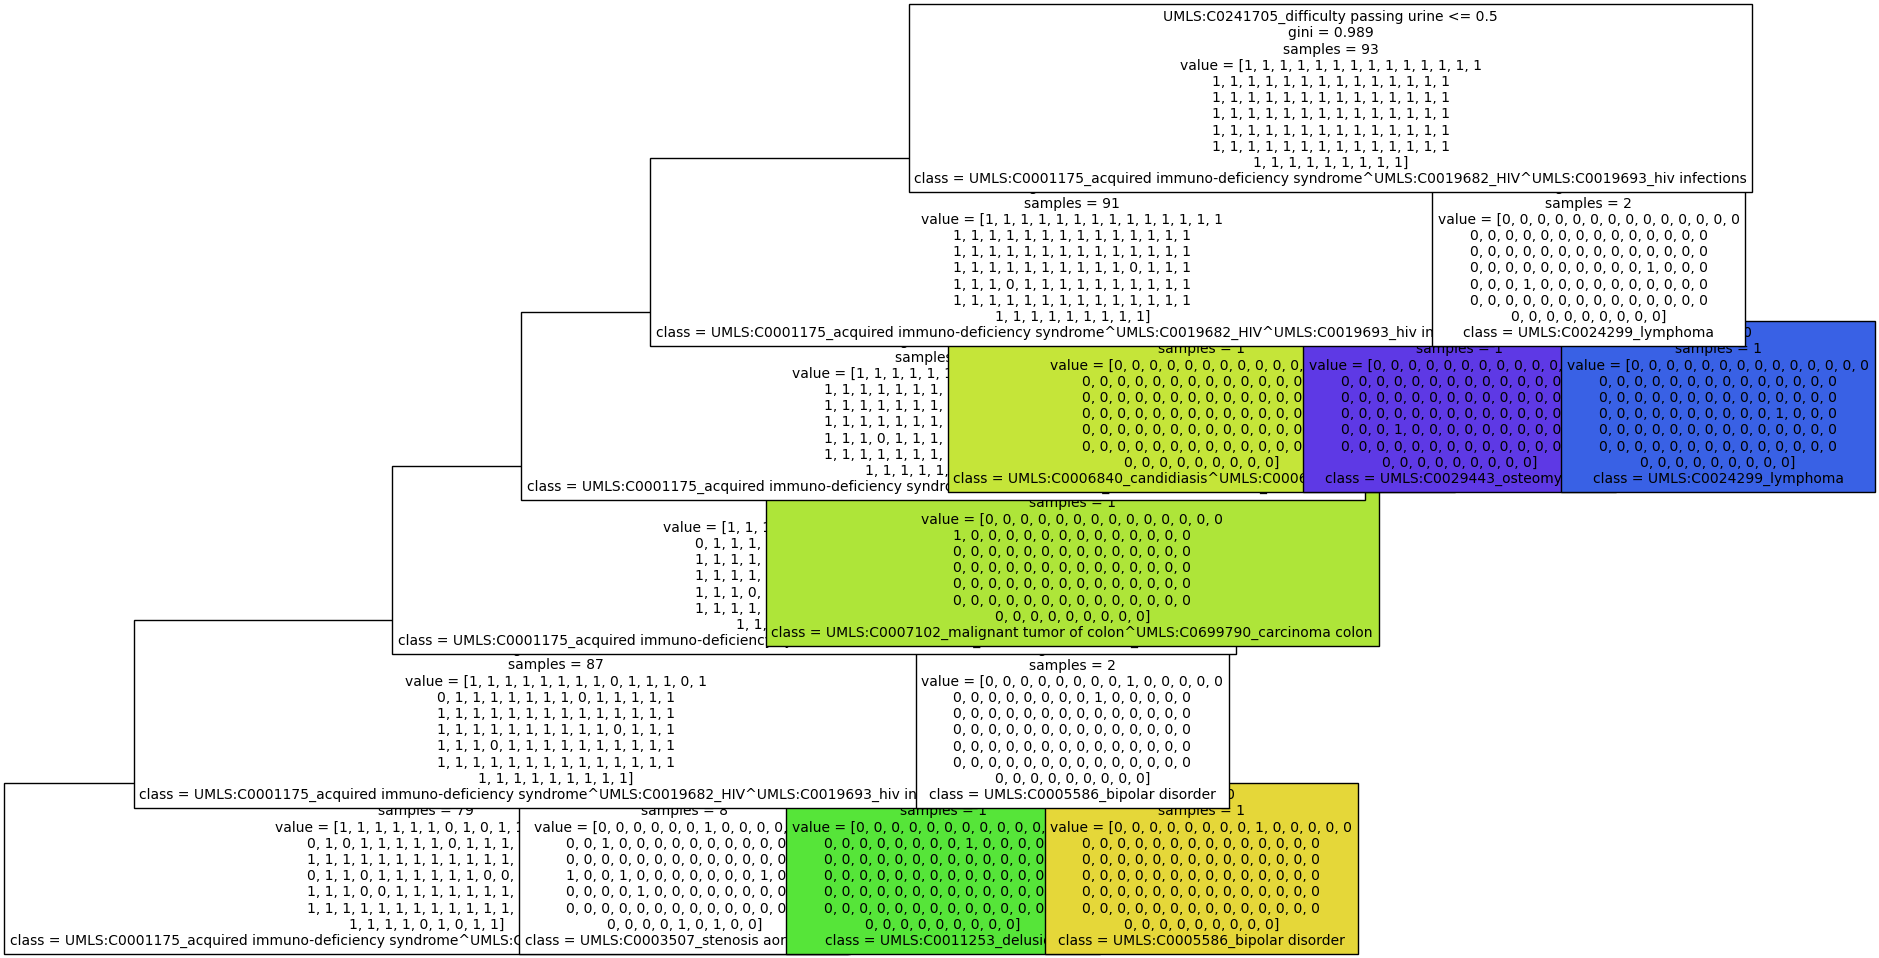

In [23]:
# Build a decision tree with max depth constraint
model_constrained = DecisionTreeClassifier(max_depth=5)
model_constrained.fit(X_train, y_train)

# Check accuracies
train_accuracy_constrained = model_constrained.score(X_train, y_train)
test_accuracy_constrained = model_constrained.score(X_test, y_test)

print(f"Training Accuracy (Max Depth=5): {train_accuracy_constrained}")
print(f"Test Accuracy (Max Depth=5): {test_accuracy_constrained}")

# Convert class names and feature names to lists
class_names = list(model_constrained.classes_)
feature_names = list(X_train.columns)

# Plot the constrained decision tree with larger font and figure size
plt.figure(figsize=(20, 12))  # Adjust figure size
plot_tree(model_constrained, 
          filled=True, 
          feature_names=feature_names,  # Convert column names to list
          class_names=class_names,  # Convert class names to list
          fontsize=10)  # Increase font size for better visibility
plt.show()

Training Accuracy (Entropy): 0.34408602150537637
Test Accuracy (Entropy): 0.0


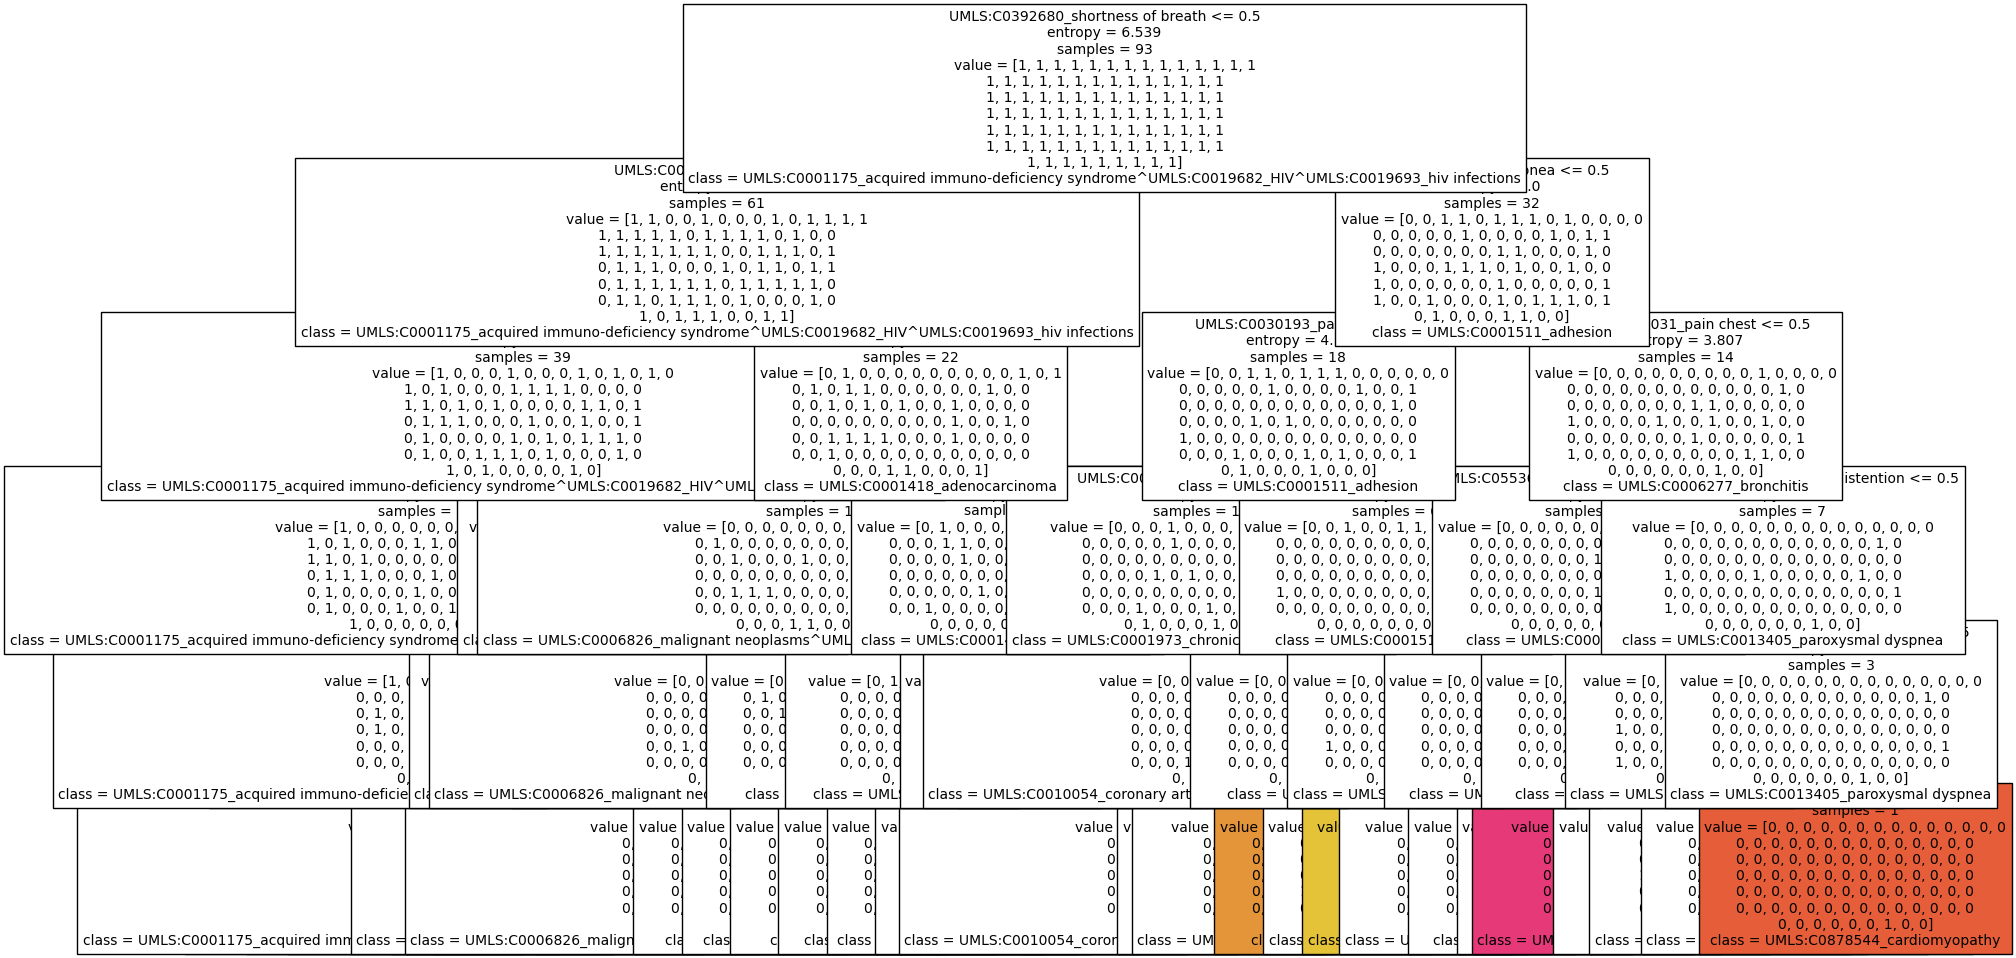

In [25]:
# Change criterion to 'entropy'
model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model_entropy.fit(X_train, y_train)

# Check accuracies
train_accuracy_entropy = model_entropy.score(X_train, y_train)
test_accuracy_entropy = model_entropy.score(X_test, y_test)

print(f"Training Accuracy (Entropy): {train_accuracy_entropy}")
print(f"Test Accuracy (Entropy): {test_accuracy_entropy}")

# Convert class names and feature names to lists
class_names = list(model_entropy.classes_)
feature_names = list(X_train.columns)

# Plot the decision tree with entropy criterion
plt.figure(figsize=(20, 12))  # Adjust figure size
plot_tree(model_entropy, 
          filled=True, 
          feature_names=feature_names,  # Convert column names to list
          class_names=class_names,  # Convert class names to list
          fontsize=10)  # Increase font size for better visibility
plt.show()